# Title: Bank Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

In [28]:
# A Data-Driven Approach to Predict the Success of Bank Telemarketing.

In [42]:
# library

import pandas as pd
import matplotlib.pyplot as plt



In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE

#load the data
bank = pd.read_csv('bank.csv',sep=';')

In [56]:
# To see the first five row of the column
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [44]:
for col in ["job","marital","education","default","housing","loan","contact","month","poutcome"]:
    counts = bank[col].value_counts()
    print(f"Counts for {col}:")
    print(f"{counts} \n")

Counts for job:
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64 

Counts for marital:
0    2797
1    1196
2     528
Name: marital, dtype: int64 

Counts for education:
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 

Counts for default:
no     4445
yes      76
Name: default, dtype: int64 

Counts for housing:
1    2559
0    1962
Name: housing, dtype: int64 

Counts for loan:
0    3830
1     691
Name: loan, dtype: int64 

Counts for contact:
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64 

Counts for month:
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64 

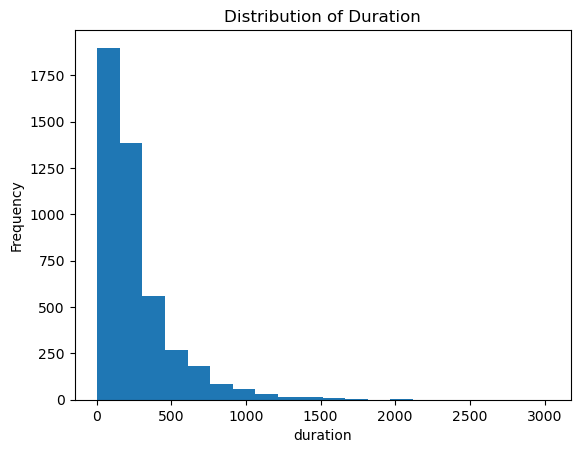

In [33]:
# Histogram to see the phone call duration distribution

plt.hist(bank['duration'], bins=20)
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()


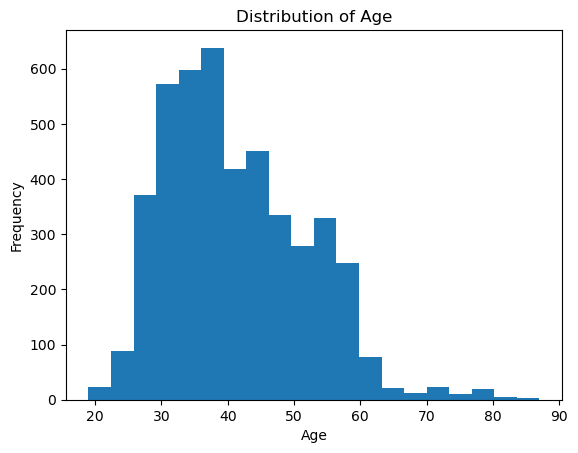

In [34]:
# Histogram of age to see the age distribution

plt.hist(bank['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

The majority of the bank customers are between the ages of 23 and 45

In [35]:
#To see the data types of each variables
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [36]:
# Check for missing or blank values
print(bank.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [37]:
# Check for missing values
print(bank.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


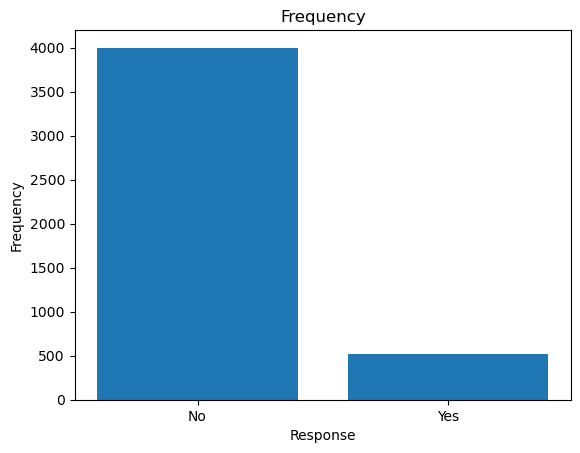

In [61]:
#value counts of response variable
counts=bank['y'].value_counts()
#plot the frequency of response variable
plt.bar(counts.index,counts.values)
plt.title("Frequency")
plt.xlabel("Response")
plt.ylabel("Frequency")
plt.xticks([0,1],["No","Yes"])
plt.show()


Based on the graph, the response variable is unbalanced.

In [62]:
#compute the percentage of yes and no
percentage_yes=counts['yes'] / bank.shape[0] * 100
percentage_no =counts['no'] / bank.shape[0] * 100

print("Percentage of yes : {:.2f}%".format(percentage_yes))

print("Percentage of no : {:.2f}%".format(percentage_no))

Percentage of yes : 11.52%
Percentage of no : 88.48%


The response variable is unbalanced. It will cause the biased prediction.

In [63]:
# use SMOTE for oversampling
oversample=SMOTE()

# Data prepocessing

### one-hot encoding

#### "job" column - since we don't know the order or rank, use one hot encoding.

#### "marital" column -  since we don't know the order or rank, use one hot encoding.

#### "contact" column -   since we don't know the order or rank, use one hot encoding.

#### "poutcome" column - since we don't know the order or rank, use one hot encoding.

#### "education" column -  since we don't know the order or rank of education, we have to use one-hot encoding.

### label encoding

#### "default", "housing" and "loan" column -  since we don't know the order or rank of those features, we can use label encoding.


### ordinal encoding

#### "month" column -  since we know the order or rank of month, we can use the  ordinal encoding.


In [64]:
# one hot encoding

job_encoded=pd.get_dummies(bank['job'],prefix='job')
marital_encoded=pd.get_dummies(bank['marital'],prefix="marital")
contact_encoded=pd.get_dummies(bank['contact'],prefix="contact")
poutcome_encoded=pd.get_dummies(bank['poutcome'],prefix="poutcome")
education_encoded=pd.get_dummies(bank['education'],prefix='education')


In [76]:
#join the encoded data with oringal dataframe
bank=pd.concat([bank,job_encoded,marital_encoded,contact_encoded,poutcome_encoded,education_encoded],axis=1)

In [78]:
# label encoding
bank['default_encoded']=LabelEncoder().fit_transform(bank['default'])
bank['housing_encoded']=LabelEncoder().fit_transform(bank['housing'])
bank['loan_encoded']=LabelEncoder().fit_transform(bank['loan'])

In [79]:
# ordinal encoding
bank['month_encoded']=OrdinalEncoder().fit_transform(bank[['month']])

In [80]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown,default_encoded,housing_encoded,loan_encoded,month_encoded
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,1,1,0,0,0,0,0,0,10.0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,0,1,0,0,0,1,1,8.0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,1,0,0,1,0,0.0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0,1,0,0,1,0,0,1,1,6.0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,1,0,1,0,0,0,1,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,0,1,0,1,0,0,0,1,0,5.0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,0,1,0,0,1,0,1,1,1,8.0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,0,1,0,1,0,0,0,0,0,1.0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,0,0,0,1,0,0,0,0,0,3.0
